In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler , OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
import folium 
import warnings 
import matplotlib as plt 
import seaborn as sns 
import os 
from math import sqrt , radians , sin , cos , atan2

In [4]:
os.getcwd()

'd:\\Delivery-time-prediction\\experiment'

In [5]:
os.chdir("../")

In [6]:
df = pd.read_csv(r"experiment\finalTrain.csv")

In [7]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [9]:
df.shape

(45584, 20)

In [10]:
df.size

911680

In [11]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [12]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [13]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [14]:
for i in df.columns:
    print(f" no. of unique value in {i}  is   : {df[i].nunique()}")
    print("#######################################################")
    if (df[i].nunique()) < 8:
        print(f"           unique value are : {df[i].unique()}")
        print("***************************************************")
    else:
        pass

 no. of unique value in ID  is   : 45584
#######################################################
 no. of unique value in Delivery_person_ID  is   : 1320
#######################################################
 no. of unique value in Delivery_person_Age  is   : 22
#######################################################
 no. of unique value in Delivery_person_Ratings  is   : 28
#######################################################
 no. of unique value in Restaurant_latitude  is   : 657
#######################################################
 no. of unique value in Restaurant_longitude  is   : 518
#######################################################
 no. of unique value in Delivery_location_latitude  is   : 4373
#######################################################
 no. of unique value in Delivery_location_longitude  is   : 4373
#######################################################
 no. of unique value in Order_Date  is   : 44
#####################################################

In [15]:
# lets create some features with the help of our existing features

feature = []
dtypes = []
count = []
unique = []
missing = []
missing_percentage=[]

for column in df.columns:
    feature.append(column)
    count.append(len(df[column]))
    missing.append(df[column].isnull().sum())
    unique.append(df[column].nunique())
    missing_percentage.append((df[column].isnull().sum() / df.shape[0]) * 100)
    dtypes.append(df[column].dtypes)
    
dataframe=pd.DataFrame({'feature':feature,
             'count':count,
             'missing':missing,
             'nunique':unique,
              'missing_percentage':missing_percentage,
              'dtypes':dtypes
              
             }) 
dataframe.set_index('feature')

,count,missing,nunique,missing_percentage,dtypes
feature,,,,,
ID,45584,0,45584,0.000000,object
Delivery_person_ID,45584,0,1320,0.000000,object
Delivery_person_Age,45584,1854,22,4.067217,float64
Delivery_person_Ratings,45584,1908,28,4.185679,float64
Restaurant_latitude,45584,0,657,0.000000,float64
Restaurant_longitude,45584,0,518,0.000000,float64
Delivery_location_latitude,45584,0,4373,0.000000,float64
Delivery_location_longitude,45584,0,4373,0.000000,float64
Order_Date,45584,0,44,0.000000,object


In [16]:
# dropping the id column

df.drop('ID',axis=1,inplace=True)

In [17]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True, errors="coerce")


In [18]:
df['Order_Date']

0       2022-02-12
1       2022-02-13
2       2022-03-04
3       2022-02-13
4       2022-02-14
           ...    
45579   2022-03-24
45580   2022-02-16
45581   2022-03-11
45582   2022-03-07
45583   2022-03-02
Name: Order_Date, Length: 45584, dtype: datetime64[ns]

In [19]:
df['year']= df['Order_Date'].dt.year
df['month']= df['Order_Date'].dt.month
df['day']= df['Order_Date'].dt.day

In [20]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,22:10,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,2,12
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,17:40,...,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,3,4
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,...,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14


In [21]:


# removing th eorder_date column
df.drop('Order_Date',axis=1,inplace=True)



In [22]:
# removing the null value in the time ordered column
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
year                              0
month                             0
day                               0
dtype: int64

In [23]:
df.dropna(subset=['Time_Orderd'],inplace=True) #  dropna() method removes the rows that contains NULL values.

In [24]:
df['Time_Orderd'] = df['Time_Orderd'].str.replace('.', ':')# 12:00 12.00 12:00

In [25]:


df['Time_Orderd'].sample(10)



20542    09:15
28072    15:20
42263    18:50
35383    23:20
30433    17:25
27144    21:25
31104    19:55
31006    19:45
14965    0:375
8547     17:30
Name: Time_Orderd, dtype: object

In [26]:
# Define a lambda function with error handling

def extract_time(x):
    try:
        return x.split(':')[0] + ':' + x.split(':')[1][:2]
    except IndexError:
        return '00:00'

# Apply the lambda function to the Order_Time column
df['Time_Orderd'] = df['Time_Orderd'].apply(extract_time)

In [27]:
# Convert the Order_Time column to a time data type
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S',errors='ignore')

C:\Users\codey\AppData\Local\Temp\ipykernel_21768\748934312.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S',errors='ignore')


In [28]:
df['TimeOrder_Hour']=df['Time_Orderd'].str.split(':',expand=True)[0] # 12:00 -> 12, 00


# replacing '0' with '00'  - both indicate 24th hr 
df['TimeOrder_Hour']=df['TimeOrder_Hour'].replace('0','00') #12:00

# changing the datatype
df['TimeOrder_Hour']=df['TimeOrder_Hour'].astype('int32')

In [29]:
# order_minute
df['TimeOrder_min']=df['Time_Orderd'].str.split(':',expand=True)[1]

# changing the datatype
df['TimeOrder_min']=df['TimeOrder_min'].astype('int32')

In [30]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,motorcycle,3.0,No,Metropolitian,46,2022,2,12,21,55
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,motorcycle,1.0,No,Metropolitian,23,2022,2,13,14,55
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,scooter,1.0,No,Metropolitian,21,2022,3,4,17,30
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,motorcycle,0.0,No,Metropolitian,20,2022,2,13,9,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,scooter,1.0,No,Metropolitian,41,2022,2,14,19,50


In [31]:
df['Time_Order_picked'] = df['Time_Order_picked'].str.replace('.', ':')

In [32]:
# Define a lambda function with error handling
def extract_time(x):
    try:
        return x.split(':')[0] + ':' + x.split(':')[1][:2]
    except IndexError:
        return '00:00'

# Apply the lambda function to the Order_Time column
df['Time_Order_picked'] = df['Time_Order_picked'].apply(extract_time)

In [33]:
# Convert the Order_Time column to a time data type
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S',errors='ignore')

C:\Users\codey\AppData\Local\Temp\ipykernel_21768\2668744176.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S',errors='ignore')


In [34]:
df['Time_Order_picked_Hour']=df['Time_Order_picked'].str.split(':',expand=True)[0]



# changing the datatype
df['Time_Order_picked_Hour']=df['Time_Order_picked_Hour'].astype('int32')

In [35]:
# order_minute
df['Time_Order_picked_min']=df['Time_Order_picked'].str.split(':',expand=True)[1]

# changing the datatype
df['Time_Order_picked_min']=df['Time_Order_picked_min'].astype('int32')

In [36]:
# spilliting the Delivery_person_id  on the bases of "RES", this will give us the city name of delivery

df['Delivery_city']=df['Delivery_person_ID'].str.split('RES',expand=True)[0]

In [37]:
df['Delivery_city']

0           DEH
1           KOC
2          PUNE
3          LUDH
4           KNP
          ...  
45579       JAP
45580       AGR
45581      CHEN
45582     COIMB
45583    RANCHI
Name: Delivery_city, Length: 43853, dtype: object

In [38]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,Metropolitian,46,2022,2,12,21,55,22,10,DEH
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,Metropolitian,23,2022,2,13,14,55,15,5,KOC
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,Metropolitian,21,2022,3,4,17,30,17,40,PUNE
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,Metropolitian,20,2022,2,13,9,20,9,30,LUDH
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,Metropolitian,41,2022,2,14,19,50,20,5,KNP


In [39]:
df['Delivery_city'].unique()

array(['DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'MYS', 'HYD', 'KOL',
       'RANCHI', 'COIMB', 'CHEN', 'JAP', 'SUR', 'BANG', 'GOA', 'AURG',
       'AGR', 'VAD', 'ALH', 'BHP', 'INDO'], dtype=object)

In [40]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city'],
      dtype='object')

In [41]:
df['Restaurant_latitude'].dtypes

dtype('float64')

In [42]:
df['Delivery_person_Ratings'].isnull().sum()

np.int64(268)

In [43]:
rating_map = round(df.groupby('Delivery_person_ID')['Delivery_person_Ratings'].mean(),1).to_dict()

df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].fillna(df['Delivery_person_ID'].map(rating_map))

# fillup the missing value in delivery_person_rating with the help of mean value of every delivery_person_id

In [44]:
df['Delivery_person_Ratings'].isnull().sum()

# now the missing value is null



np.int64(0)

In [45]:
folium.Map(tiles="cartodb positron")

In [46]:


# plotting the lattitude and loggitude
import plotly.express as px
data1 = df.copy()
data1.dropna(axis=0,how='any',subset=None,inplace=True)
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_map(data1, lat="Restaurant_latitude", lon="Restaurant_longitude", color_continuous_scale=color_scale,zoom=8, 
                        height=1000,width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()



In [47]:
# changing -ve to +ve dataset
"""
abs() function return the absolute value. The absolute
value of any number is always positive it removes the negative sign of a number in Python.
"""
df['Restaurant_latitude'] = df['Restaurant_latitude'].abs()

In [48]:
import math

def distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    R = 6371.0 # Earth's radius in km
    dist = R * c
    
    return dist
df['distance'] = df.apply(lambda row: distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

In [49]:
a = "Karan"
print(dir(a))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'removeprefix', 'removesuffix', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


In [50]:
df['distance'].head()

0    10.280582
1     6.242319
2    13.787860
3     2.930258
4    19.396618
Name: distance, dtype: float64

In [51]:
df.groupby(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'])['distance'].max().head(40)

Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  Delivery_location_longitude
0.000000             0.000000              0.010000                    0.010000                        1.572534
                                           0.020000                    0.020000                        3.145067
                                           0.030000                    0.030000                        4.717601
                                           0.040000                    0.040000                        6.290135
                                           0.050000                    0.050000                        7.862668
                                           0.060000                    0.060000                        9.435202
                                           0.070000                    0.070000                       11.007735
                                           0.080000                    0.080000                       12.580268
     

In [52]:
df[(df['Restaurant_latitude'] < 8) & (df['Delivery_location_latitude'] < 8)].shape

# these 3509 record is of no use. bcz the wrong lattitude is mention

(3509, 27)

In [53]:
# droping  where  restaurant_lattitude and delivery_location_latitude less than 8

df = df.drop(df[(df['Restaurant_latitude'] < 8) & (df['Delivery_location_latitude'] < 8)].index)

In [54]:
df[(df['Restaurant_latitude'] > 37) & (df['Delivery_location_latitude'] > 37)]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance


In [55]:
df[(df['Restaurant_longitude'] < 68) & (df['Delivery_location_longitude'] < 68)]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance


In [56]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city', 'distance'],
      dtype='object')

In [57]:


min_distance=df.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].min().sort_values(by='distance',ascending=True).head(1)
min_distance



,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
distance,,,,
1.465067,30.914057,75.83982,30.924057,75.84982


In [58]:
import folium
from branca.element import Figure
fig2=Figure(width=850,height=550)

# Create a map object centered on a specific location
m = folium.Map(location=[30.914057, 75.83982], zoom_start=12)

# Add a marker for the restaurant location
folium.Marker(location=[30.914057, 75.83982], popup="Restaurant",icon=folium.Icon(color='purple',prefix='fa',icon='anchor')).add_to(m)

# Add a marker for the delivery location
folium.Marker(location=[30.924057, 75.84982], popup="Delivery").add_to(m)

# Draw a line between the two locations
folium.PolyLine(locations=[[30.914057, 75.83982], [30.924057, 75.84982]], color='red').add_to(m)

# Display the map

fig2.add_child(m)
folium.TileLayer('Stamen Terrain' , attr='Stamen').add_to(m)
folium.TileLayer('Stamen Toner',attr='Stamen').add_to(m)
folium.TileLayer('Stamen Water Color',attr='Stamen').add_to(m)
folium.TileLayer('cartodbpositron',attr='Stamen').add_to(m)
folium.TileLayer('cartodbdark_matter',attr='Stamen').add_to(m)
folium.LayerControl().add_to(m)

In [59]:
max_distance=df.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].max().sort_values(by='distance',ascending=False).head(1)
max_distance

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
distance,,,,
20.969489,25.443994,81.860187,25.583994,82.000187


In [60]:


 

tooltips=f"Distance: {df['distance'].max()} km"

In [61]:
# plotting the lattitude and loggitude
import plotly.express as px
data1 = df.copy()
data1.dropna(axis=0,how='any',subset=None,inplace=True)
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(data1, lat="Restaurant_latitude", lon="Restaurant_longitude", color_continuous_scale=color_scale,zoom=8, 
                        height=1000,width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

C:\Users\codey\AppData\Local\Temp\ipykernel_21768\3241373962.py:6: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



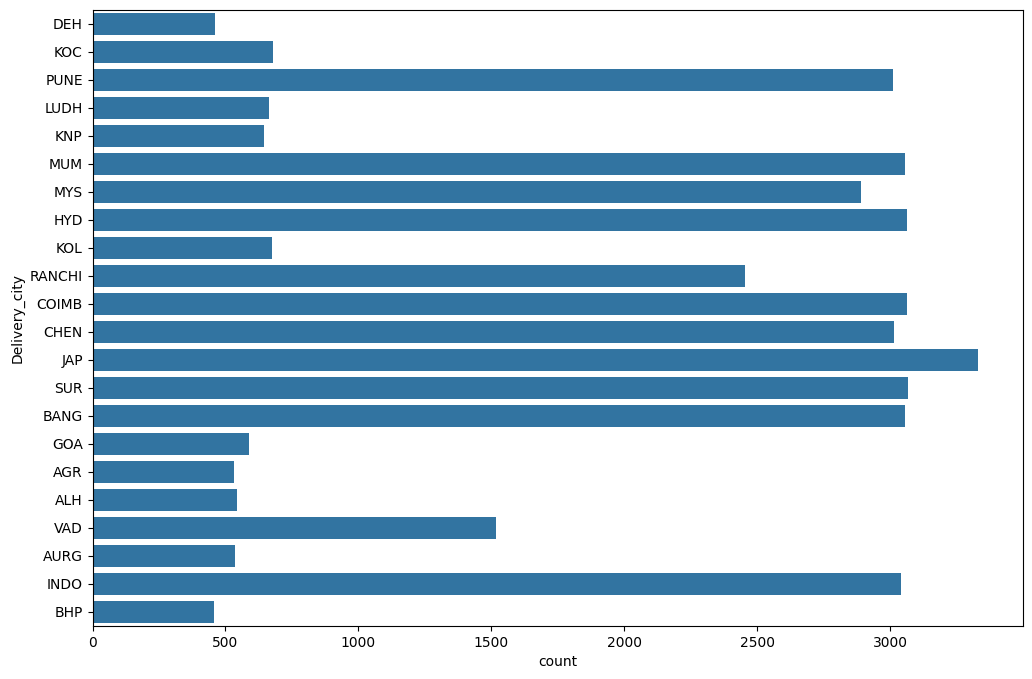

In [62]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.countplot(df['Delivery_city'])
plt.xticks(rotation='horizontal')
plt.show()



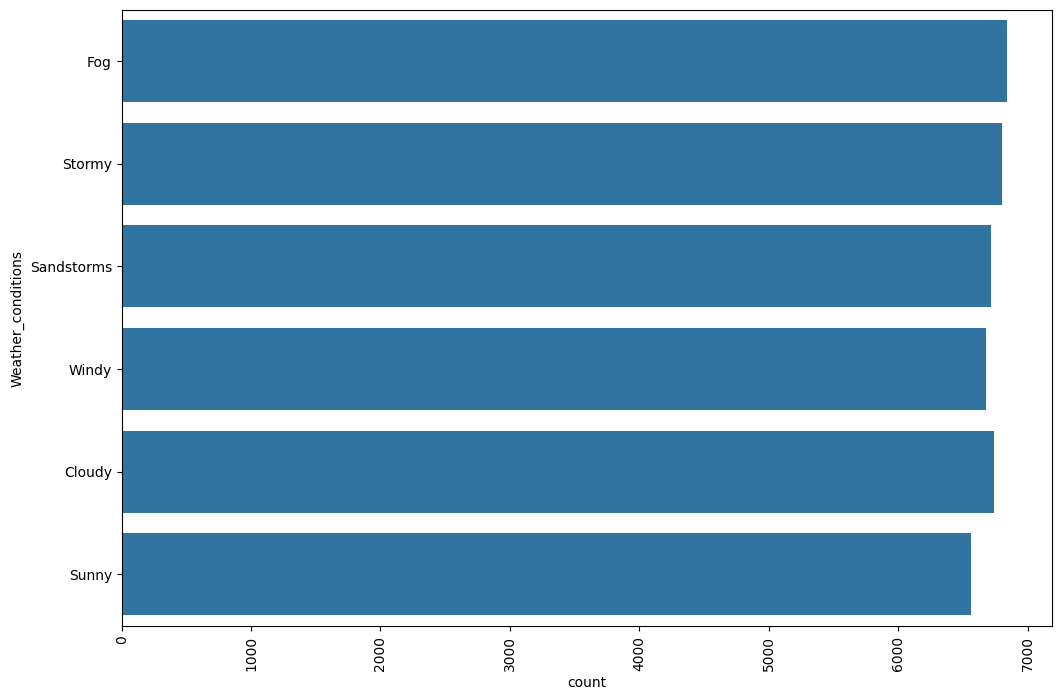

In [63]:


plt.figure(figsize=(12,8))
sns.countplot(df['Weather_conditions'])
plt.xticks(rotation='vertical')
plt.show()



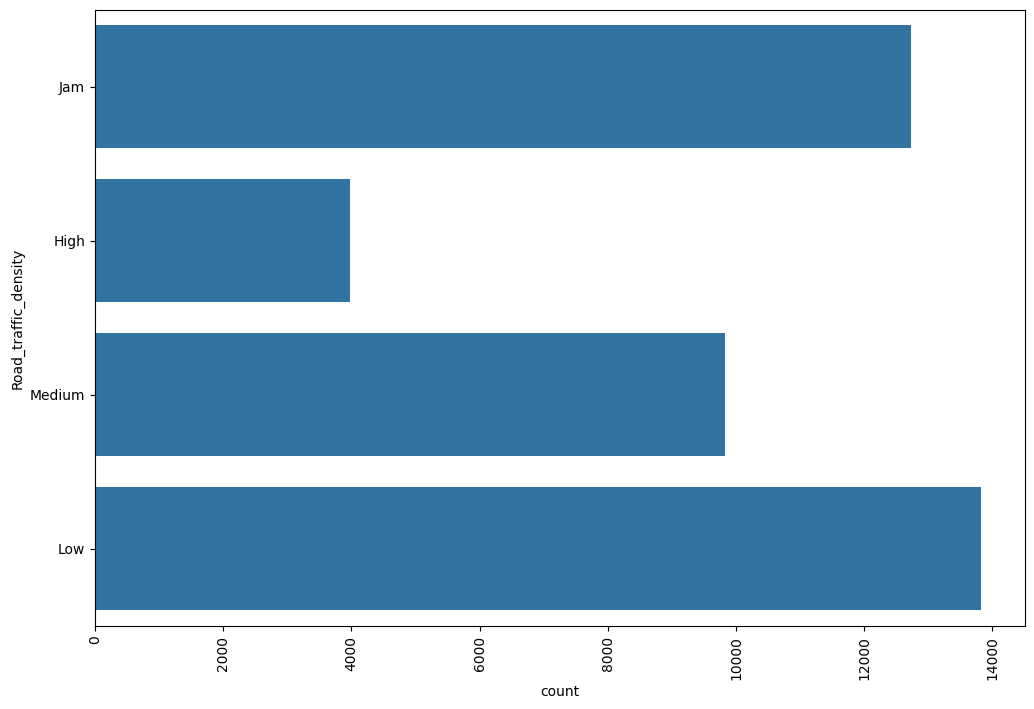

In [64]:


plt.figure(figsize=(12,8))
sns.countplot(df['Road_traffic_density'])
plt.xticks(rotation='vertical')
plt.show()

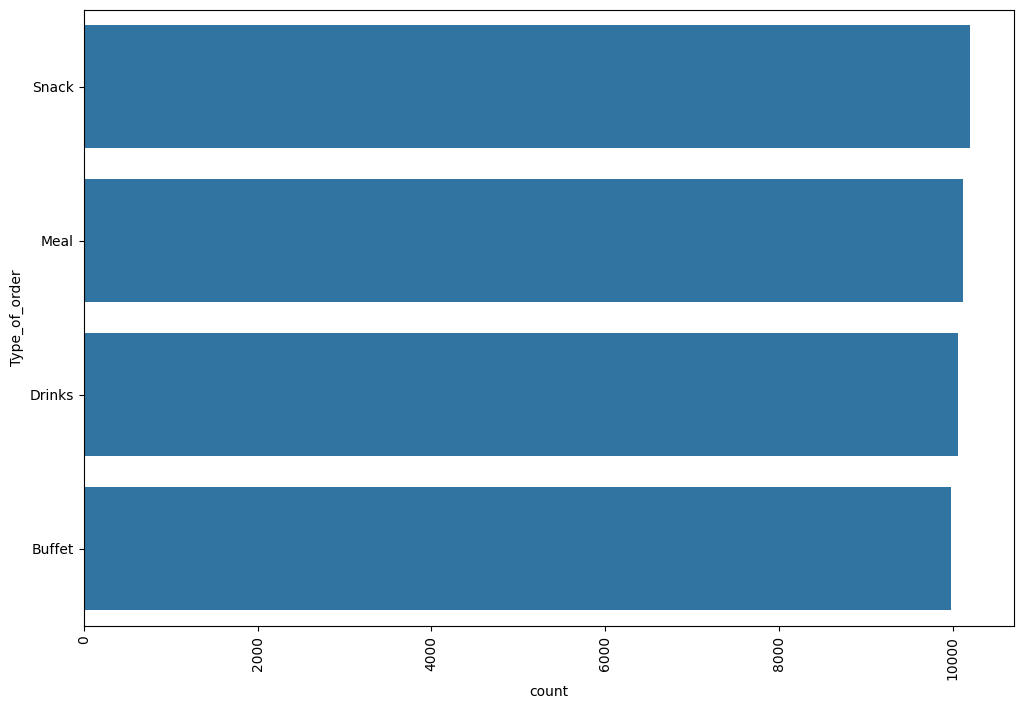

In [ ]:


plt.figure(figsize=(12,8))
sns.countplot(df['Type_of_order'])
plt.xticks(rotation='vertical')
plt.show()



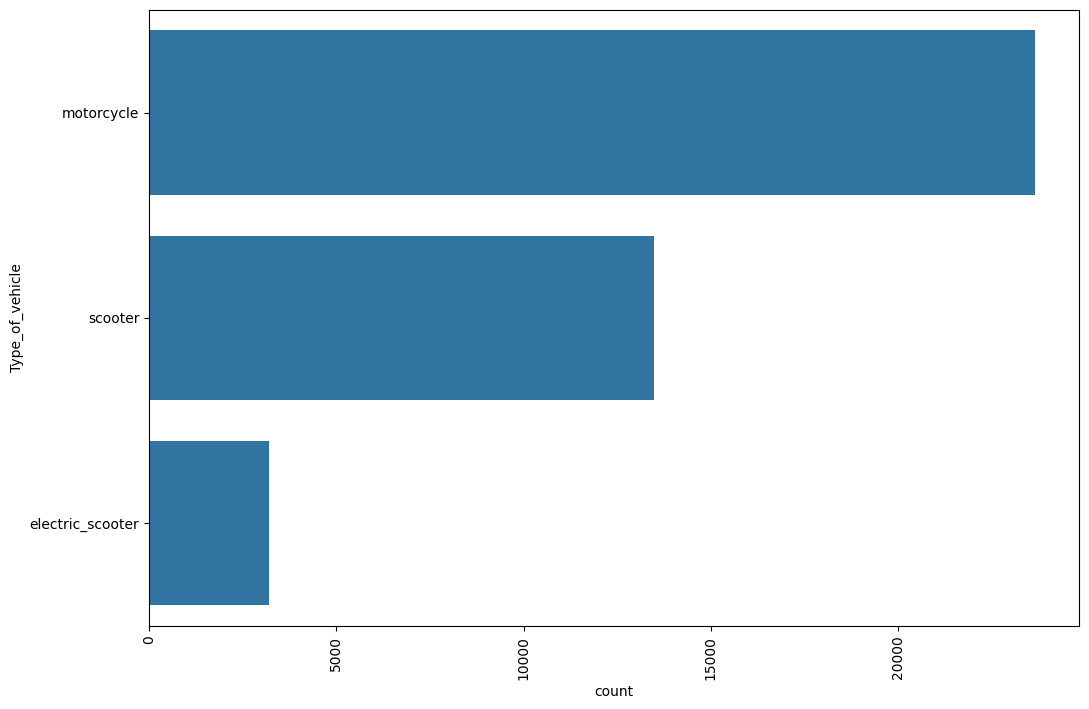

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['Type_of_vehicle'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['multiple_deliveries'])
plt.xticks(rotation='vertical')
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001CF7DBBE9D0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['Festival'])
plt.xticks(rotation='vertical')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['City'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:


plt.figure(figsize=(12,8))
sns.countplot(df['day'])
plt.xticks(rotation='vertical')
plt.show()



In [ ]:


plt.figure(figsize=(12,8))

sns.countplot(df['TimeOrder_Hour'])
plt.xticks(rotation='vertical')
plt.show()



In [ ]:


# plotting a countplot of Festival and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Delivery_city'])
plt.title("Countplot on cities")

plt.subplot(1,2,2)
data1 = df.groupby(['Delivery_city']).median().reset_index()
ax = sns.barplot(x='Delivery_city', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Delivery_city with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)



In [ ]:
# plotting a countplot of Festival and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Festival'])
plt.title("Countplot on Festival")

plt.subplot(1,2,2)
data1 = df.groupby(['Festival']).median().reset_index()
ax = sns.barplot(x='Festival', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Festival with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
# plotting a countplot of City and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['City'])
plt.title("Countplot on City")

plt.subplot(1,2,2)
data1 = df.groupby(['City']).median().reset_index()
ax = sns.barplot(x='City', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('barplot on City with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
# plotting a countplot of Type_of_vehicle and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Type_of_vehicle'])
plt.title("Countplot on Type_of_vehicle")

plt.subplot(1,2,2)
data1 = df.groupby(['Type_of_vehicle']).median().reset_index()
ax = sns.barplot(x='Type_of_vehicle', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Type_of_vehicle with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
# plotting a countplot of Road traffic density and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Road_traffic_density'])
plt.title("Countplot on Road_traffic_density")

plt.subplot(1,2,2)
data1 = df.groupby(['Road_traffic_density']).median().reset_index()
ax = sns.barplot(x='Road_traffic_density', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Road_traffic_density with mean Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
# The avg delivery person age w.r.t Time taken in min
data1 = df.groupby(['Time_taken (min)']).mean().reset_index()

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(x='Delivery_person_Age',y='Time_taken (min)',data=data1)
plt.xlabel('Avg Delivery person age')
plt.ylabel("Time taken min")
plt.title('Avg age vs time taken')

plt.subplot(1,2,2)
sns.boxplot(y=df['Delivery_person_Age'])
plt.tight_layout()
plt.show()

In [ ]:
data1 = df.groupby(['Delivery_person_Ratings']).mean().reset_index()
data1.sort_values('Time_taken (min)',inplace=True)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=data1.head(10),x='Delivery_person_Ratings',y='Time_taken (min)')

data2 = df.groupby(['Delivery_person_Ratings']).median().reset_index()
data2.sort_values('Time_taken (min)',inplace=True)
plt.subplot(1,2,2)
sns.barplot(data=data2.head(10),x='Delivery_person_Ratings',y='Time_taken (min)')
plt.show()

In [ ]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_feature

In [ ]:


df.isnull().sum()



In [66]:


df['multiple_deliveries'].dtypes



dtype('float64')

In [67]:
df.drop('Delivery_person_ID',axis=1,inplace=True)

In [68]:
df.drop(['Time_Orderd','Time_Order_picked'],axis=1,inplace=True)


# dropping time ordered and time order_picked


In [69]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city', 'distance'],
      dtype='object')

In [70]:


num_col=[feature for feature in df.columns if df[feature].dtypes != 'O']
cat_col=[feature for feature in df.columns if df[feature].dtypes == 'O']



In [71]:


num_col



['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)',
 'year',
 'month',
 'day',
 'TimeOrder_Hour',
 'TimeOrder_min',
 'Time_Order_picked_Hour',
 'Time_Order_picked_min',
 'distance']

In [72]:
cat_col

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City',
 'Delivery_city']

In [73]:
df.sample()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance
15768,37.0,5.0,18.563934,73.915367,18.613934,73.965367,Cloudy,Jam,2,Meal,...,33,2022,3,1,19,35,19,50,PUNE,7.660317


In [74]:
df.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude',
        'year','month','day','TimeOrder_min','Time_Order_picked_Hour','Time_Order_picked_min'],axis=1,inplace=True)

In [75]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),TimeOrder_Hour,Delivery_city,distance
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21,DEH,10.280582
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14,KOC,6.242319
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,17,PUNE,13.787860
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,9,LUDH,2.930258
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,KNP,19.396618


In [76]:
X = df.drop(labels=['Time_taken (min)'],axis=1)
y = df[['Time_taken (min)']]

In [77]:


df[cat_col].head()



,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City,Delivery_city
0,Fog,Jam,Snack,motorcycle,No,Metropolitian,DEH
1,Stormy,High,Meal,motorcycle,No,Metropolitian,KOC
2,Sandstorms,Medium,Drinks,scooter,No,Metropolitian,PUNE
3,Sandstorms,Low,Buffet,motorcycle,No,Metropolitian,LUDH
4,Fog,Jam,Snack,scooter,No,Metropolitian,KNP


In [78]:


num_col=[feature for feature in df.columns if df[feature].dtypes != 'O']



In [79]:


df[num_col].head()



,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),TimeOrder_Hour,distance
0,36.0,4.2,2,3.0,46,21,10.280582
1,21.0,4.7,1,1.0,23,14,6.242319
2,23.0,4.7,1,1.0,21,17,13.787860
3,34.0,4.3,0,0.0,20,9,2.930258
4,24.0,4.7,1,1.0,41,19,19.396618


In [80]:


df[df['Road_traffic_density']=='Low']



,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),TimeOrder_Hour,Delivery_city,distance
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,9,LUDH,2.930258
11,31.0,4.7,Sandstorms,Low,2,Meal,electric_scooter,0.0,No,Metropolitian,26,22,RANCHI,19.618739
12,37.0,5.0,Sandstorms,Low,1,Snack,motorcycle,1.0,No,Metropolitian,20,8,COIMB,1.558132
17,35.0,4.3,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,38,23,SUR,13.682045
19,23.0,4.8,Windy,Low,2,Buffet,electric_scooter,0.0,No,Urban,12,23,PUNE,16.853619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45569,30.0,4.9,Windy,Low,1,Snack,motorcycle,1.0,No,Metropolitian,26,10,COIMB,3.116127
45571,34.0,4.9,Sandstorms,Low,1,Snack,scooter,1.0,No,NaN,26,9,MYS,3.109134
45573,30.0,4.6,Cloudy,Low,0,Meal,motorcycle,0.0,No,Metropolitian,20,0,PUNE,3.064267
45575,37.0,4.8,Sandstorms,Low,2,Drinks,electric_scooter,0.0,No,Metropolitian,20,9,CHEN,3.104827


In [81]:
Road_traffic_density=['Low','Medium','High','Jam']
Weather_conditions=['Sunny','Cloudy','Windy','Fog','Sandstorms','Stormy']

In [82]:
categorical_column=['Type_of_order','Type_of_vehicle','Festival','City','Delivery_city']
ordinal_encod=['Road_traffic_density','Weather_conditions']
numerical_column=['Delivery_person_Age','Delivery_person_Ratings','Vehicle_condition','multiple_deliveries',
                  'TimeOrder_Hour','distance']

In [84]:
from sklearn.preprocessing import OrdinalEncoder

In [85]:
# numerical pipeline

numerical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='constant',fill_value=0)),
    ('scaler',StandardScaler(with_mean=False))
])

# categorical pipeline

categorical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
    ('scaler',StandardScaler(with_mean=False))
])


# ordinal pipeline

ordianl_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ordinal',OrdinalEncoder(categories=[Road_traffic_density,Weather_conditions])),
    ('scaler',StandardScaler(with_mean=False))   
])

In [86]:
preprocessor =ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,numerical_column),
    ('categorical_pipeline',categorical_pipeline,categorical_column),
    ('ordianl_pipeline',ordianl_pipeline,ordinal_encod)
])

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [94]:
X_train=preprocessor.fit_transform(X_train)

In [95]:
X_test=preprocessor.transform(X_test)

In [96]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 

from xgboost import XGBRegressor



from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [97]:
def evaluate_reg(true, predicted):
    r2 = r2_score(true, predicted) # Calculate r2 score
    MAE = mean_absolute_error(true, predicted) # Calculate MAE
    MSE = mean_squared_error(true, predicted) # Calculate MSE
    rmse = np.sqrt(mean_squared_error(true, predicted))
   
    return r2, MAE , MSE,rmse

In [99]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "linear Regression": LinearRegression(),
    "Ridge":Ridge(),
    "XGBRegressor": XGBRegressor(), 
  
}

r2_list=[]
mse_list=[]
models_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    

    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
     # Test set performance
    r2,MAE,MSE,rmse=evaluate_reg(y_test, y_test_pred)
    r2_train,MAE_train,MSE_train,rmse_train=evaluate_reg(y_train, y_train_pred)
    

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    

    
    print('Model performance for Test set')
    print('- r2_score: {:.4f}'.format(r2))
    print('- MAE: {:.4f}'.format(MAE))
    print('- MSE: {:.4f}'.format(MSE))
    print('- rmse: {:.4f}'.format(rmse))
    r2_list.append(r2)
    mse_list.append(MSE)
    
    print('-'*35)
        
    print('Model performance for train set')
    print('- r2_score: {:.4f}'.format(r2_train))
    print('- MAE: {:.4f}'.format(MAE_train))
    print('- MSE: {:.4f}'.format(MSE_train))
    print('- rmse: {:.4f}'.format(rmse_train))

    print('='*35)
    print('='*35)
    print('\n')

c:\Users\codey\anaconda3\envs\delivery\lib\site-packages\sklearn\base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Random Forest
Model performance for Test set
- r2_score: 0.8287
- MAE: 3.1296
- MSE: 15.2893
- rmse: 3.9102
-----------------------------------
Model performance for train set
- r2_score: 0.9759
- MAE: 1.1493
- MSE: 2.1097
- rmse: 1.4525


Decision Tree
Model performance for Test set
- r2_score: 0.6891
- MAE: 4.0426
- MSE: 27.7519
- rmse: 5.2680
-----------------------------------
Model performance for train set
- r2_score: 1.0000
- MAE: 0.0000
- MSE: 0.0000
- rmse: 0.0000




c:\Users\codey\anaconda3\envs\delivery\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Gradient Boosting
Model performance for Test set
- r2_score: 0.7689
- MAE: 3.6392
- MSE: 20.6260
- rmse: 4.5416
-----------------------------------
Model performance for train set
- r2_score: 0.7734
- MAE: 3.5725
- MSE: 19.8255
- rmse: 4.4526


linear Regression
Model performance for Test set
- r2_score: 0.5352
- MAE: 5.1301
- MSE: 41.4830
- rmse: 6.4407
-----------------------------------
Model performance for train set
- r2_score: 0.5396
- MAE: 5.0352
- MSE: 40.2714
- rmse: 6.3460


Ridge
Model performance for Test set
- r2_score: 0.5352
- MAE: 5.1301
- MSE: 41.4830
- rmse: 6.4407
-----------------------------------
Model performance for train set
- r2_score: 0.5396
- MAE: 5.0352
- MSE: 40.2714
- rmse: 6.3460


XGBRegressor
Model performance for Test set
- r2_score: 0.8288
- MAE: 3.1347
- MSE: 15.2790
- rmse: 3.9088
-----------------------------------
Model performance for train set
- r2_score: 0.8752
- MAE: 2.6442
- MSE: 10.9201
- rmse: 3.3046




In [100]:


Results = pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name', 'r2_score'])
Results.sort_values(by=["r2_score"],ascending=False)



,Model Name,r2_score
5,XGBRegressor,0.828820
0,Random Forest,0.828704
2,Gradient Boosting,0.768913
1,Decision Tree,0.689077
3,linear Regression,0.535238
4,Ridge,0.535238


In [101]:
Results = pd.DataFrame(list(zip(models_list, mse_list)), columns=['Model Name', 'Mse'])
Results.sort_values(by=["Mse"],ascending=True)

,Model Name,Mse
5,XGBRegressor,15.278972
0,Random Forest,15.289289
2,Gradient Boosting,20.626048
1,Decision Tree,27.751890
3,linear Regression,41.482985
4,Ridge,41.482991
